In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


In [2]:
# Load the dataset (replace with your actual dataset path)
try:
    df = pd.read_csv('rural_education_dropout.csv')
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
except FileNotFoundError:
    print("Error: Dataset file not found. Please ensure the file path is correct.")


Error: Dataset file not found. Please ensure the file path is correct.


In [6]:
 # Create sample data for demonstration
data = {
        'student_id': range(1, 1001),
        'age': np.random.randint(6, 15, 1000),
        'gender': np.random.choice(['Male', 'Female'], 1000),
        'family_income': np.random.choice(['Low', 'Medium', 'High'], 1000, p=[0.6, 0.3, 0.1]),
        'parents_education': np.random.choice(['None', 'Primary', 'Secondary', 'Higher'], 1000),
        'distance_to_school': np.random.randint(1, 20, 1000),
        'school_resources': np.random.choice(['Low', 'Medium', 'High'], 1000, p=[0.5, 0.3, 0.2]),
        'dropout': np.random.choice([0, 1], 1000, p=[0.7, 0.3])
    }
df = pd.DataFrame(data)
print("\nSample data created for demonstration purposes.")




Sample data created for demonstration purposes.


In [7]:
# Data Cleaning
def clean_data(df):
    # Handle missing values
    print("\nMissing values before cleaning:")
    print(df.isnull().sum())
    
    # Fill numerical missing values with median
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    imputer_num = SimpleImputer(strategy='median')
    df[num_cols] = imputer_num.fit_transform(df[num_cols])
    
    # Fill categorical missing values with mode
    cat_cols = df.select_dtypes(include=['object']).columns
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])
    
    print("\nMissing values after cleaning:")
    print(df.isnull().sum())
    
    return df

df = clean_data(df)



Missing values before cleaning:
student_id            0
age                   0
gender                0
family_income         0
parents_education     0
distance_to_school    0
school_resources      0
dropout               0
dtype: int64

Missing values after cleaning:
student_id            0
age                   0
gender                0
family_income         0
parents_education     0
distance_to_school    0
school_resources      0
dropout               0
dtype: int64


In [8]:
# Data Preprocessing
def preprocess_data(df):
    # Encode categorical variables
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = le.fit_transform(df[col])
    
    # Feature scaling (not always necessary for tree-based models)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df.drop('dropout', axis=1))
    df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
    df_scaled['dropout'] = df['dropout']
    
    return df, df_scaled

df_encoded, df_scaled = preprocess_data(df)



In [9]:
# Exploratory Data Analysis (EDA)
def perform_eda(df):
    print("\nDataset Information:")
    print(df.info())
    
    print("\nDescriptive Statistics:")
    print(df.describe())
    
    # Dropout rate
    dropout_rate = df['dropout'].mean()
    print(f"\nOverall Dropout Rate: {dropout_rate:.2%}")
    


Text(0.5, 1.0, 'Dropout by Gender')

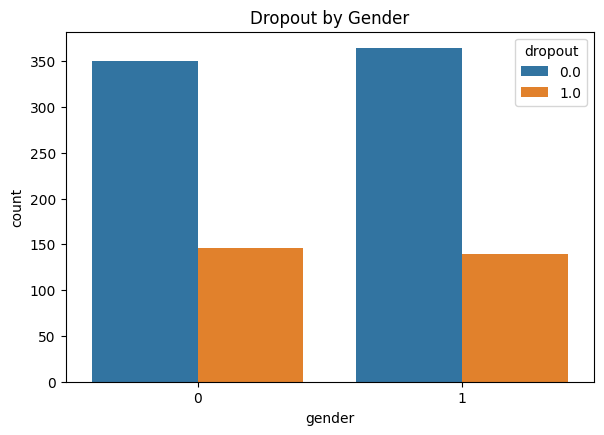

In [11]:
 # Visualizations
plt.figure(figsize=(15, 10))
    
    # Dropout by gender
plt.subplot(2, 2, 1)
sns.countplot(x='gender', hue='dropout', data=df)
plt.title('Dropout by Gender')
    


([0, 1, 2], [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

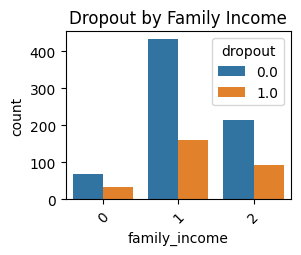

In [12]:
 # Dropout by family income
plt.subplot(2, 2, 2)
sns.countplot(x='family_income', hue='dropout', data=df)
plt.title('Dropout by Family Income')
plt.xticks(rotation=45)


([0, 1, 2, 3],
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

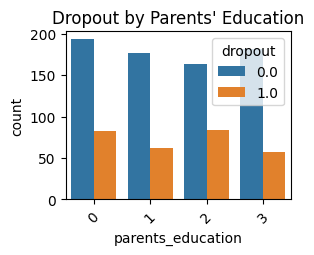

In [13]:
# Dropout by parents' education
plt.subplot(2, 2, 3)
sns.countplot(x='parents_education', hue='dropout', data=df)
plt.title("Dropout by Parents' Education")
plt.xticks(rotation=45)


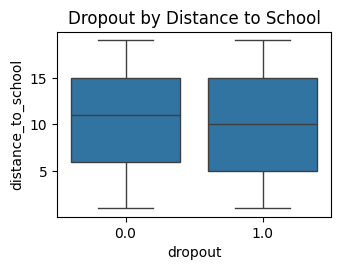

In [14]:
 # Dropout by distance to school
plt.subplot(2, 2, 4)
sns.boxplot(x='dropout', y='distance_to_school', data=df)
plt.title('Dropout by Distance to School')
    
plt.tight_layout()
plt.savefig('dropout_analysis.png')
plt.show()
    


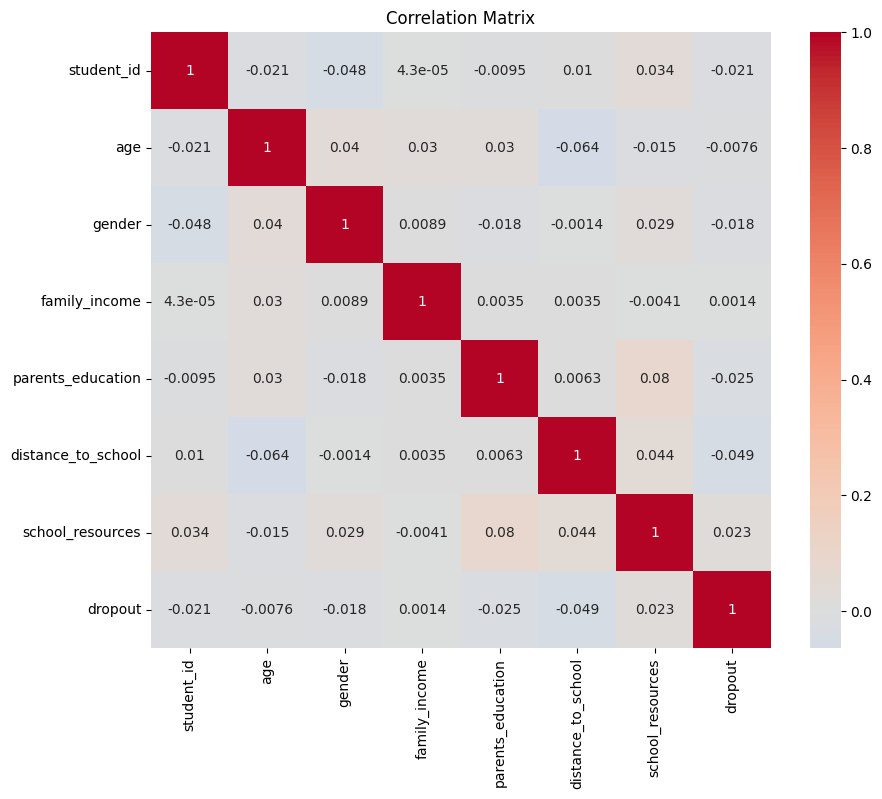


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          1000 non-null   float64
 1   age                 1000 non-null   int32  
 2   gender              1000 non-null   int64  
 3   family_income       1000 non-null   int64  
 4   parents_education   1000 non-null   int64  
 5   distance_to_school  1000 non-null   int32  
 6   school_resources    1000 non-null   int64  
 7   dropout             1000 non-null   float64
dtypes: float64(2), int32(2), int64(4)
memory usage: 54.8 KB
None

Descriptive Statistics:
        student_id         age       gender  family_income  parents_education  \
count  1000.000000  1000.00000  1000.000000    1000.000000        1000.000000   
mean    500.500000     9.89500     0.504000       1.205000           1.447000   
std     288.819436     2.62352     0.500234      

In [15]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

perform_eda(df_encoded)



In [16]:
# Machine Learning Model
def build_model(df):
    # Split data
    X = df.drop('dropout', axis=1)
    y = df['dropout']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    


In [19]:
# Split the data into training and test sets first
X = df_scaled.drop('dropout', axis=1)
y = df_scaled['dropout']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now you can train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # This will now work because X_train and y_train are defined

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
 # Predictions
y_pred = rf.predict(X_test)
    


In [21]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Accuracy: 67.67%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.92      0.80       214
         1.0       0.26      0.07      0.11        86

    accuracy                           0.68       300
   macro avg       0.49      0.50      0.46       300
weighted avg       0.58      0.68      0.60       300



In [22]:
# Feature Importance
feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
              Feature  Importance
0          student_id    0.335562
5  distance_to_school    0.222787
1                 age    0.168411
4   parents_education    0.093960
6    school_resources    0.069368
3       family_income    0.065485
2              gender    0.044427


In [24]:
def build_model(df):
    # Split data
    X = df.drop('dropout', axis=1)
    y = df['dropout']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Predictions
    y_pred = rf.predict(X_test)
    
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy:.2%}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Feature Importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nFeature Importance:")
    print(feature_importance)
    
    # Return statement must be INSIDE the function
    return rf, feature_importance

# Then call the function properly:
model, feature_importance = build_model(df_scaled)


Model Accuracy: 67.67%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.92      0.80       214
         1.0       0.26      0.07      0.11        86

    accuracy                           0.68       300
   macro avg       0.49      0.50      0.46       300
weighted avg       0.58      0.68      0.60       300


Feature Importance:
              Feature  Importance
0          student_id    0.335562
5  distance_to_school    0.222787
1                 age    0.168411
4   parents_education    0.093960
6    school_resources    0.069368
3       family_income    0.065485
2              gender    0.044427


In [29]:
def build_model(df):
    # Split data
    X = df.drop('dropout', axis=1)
    y = df['dropout']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predictions
    y_pred = rf.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy:.2%}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Feature Importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance for Dropout Prediction')
    plt.savefig('feature_importance.png')
    plt.show()

    return rf, feature_importance




Model Accuracy: 67.67%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.92      0.80       214
         1.0       0.26      0.07      0.11        86

    accuracy                           0.68       300
   macro avg       0.49      0.50      0.46       300
weighted avg       0.58      0.68      0.60       300


Feature Importance:
              Feature  Importance
0          student_id    0.335562
5  distance_to_school    0.222787
1                 age    0.168411
4   parents_education    0.093960
6    school_resources    0.069368
3       family_income    0.065485
2              gender    0.044427


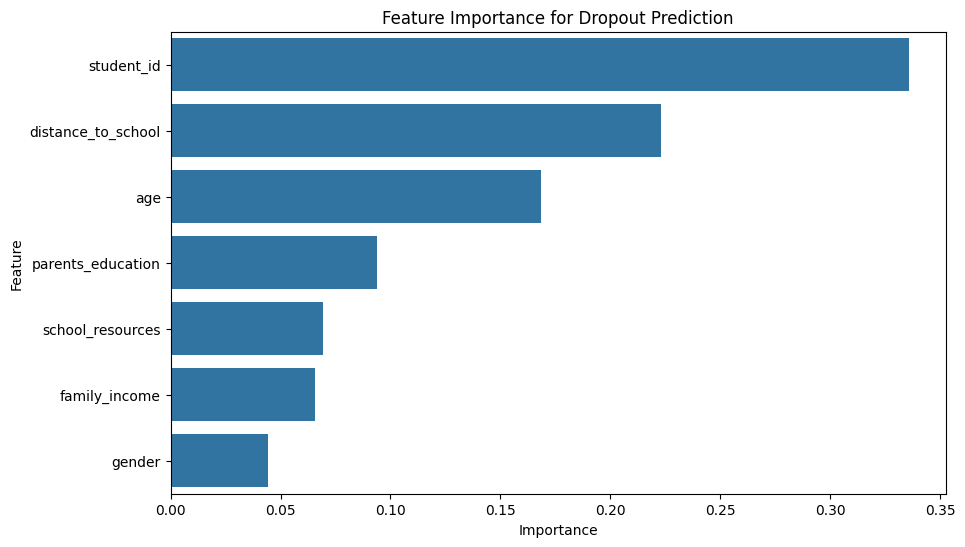

In [30]:
model, feature_importance = build_model(df_scaled)


In [32]:
# Innovation: Custom function to predict dropout risk for new students
def predict_dropout_risk(model, student_data):
    """
    Predict dropout risk for a new student based on input features.
student_data should be a dictionary with the same features as the training data.
    """

In [35]:
def predict_dropout_risk(model, student_data):
    """
    Predict dropout risk for a new student based on input features.
    student_data should be a dictionary with the same features as the training data.
    """
    # Convert input to DataFrame
    student_df = pd.DataFrame([student_data])
    
    # Clean and encode (NOTE: You may want to pass encoders here too as explained earlier)
    student_df = clean_data(student_df)
    student_encoded, _ = preprocess_data(student_df)
    
    # Predict
    prediction = model.predict(student_encoded)
    probability = model.predict_proba(student_encoded)[0][1]
    
    print(f"\nDropout Prediction: {'High Risk' if prediction[0] == 1 else 'Low Risk'}")
    print(f"Probability of Dropout: {probability:.2%}")
    
    return prediction, probability



In [43]:
def preprocess_data(df, encoders=None, fit=True):
    le_dict = encoders if encoders else {}
    
    for col in df.select_dtypes(include=['object']).columns:
        if fit:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            le_dict[col] = le
        else:
            le = le_dict[col]
            df[col] = le.transform(df[col])
    
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df.drop('dropout', axis=1, errors='ignore'))
    df_scaled = pd.DataFrame(scaled_features, columns=df.columns.drop('dropout', errors='ignore'))
    
    if 'dropout' in df.columns:
        df_scaled['dropout'] = df['dropout'].values

    return df, df_scaled, le_dict


In [44]:
df_encoded, df_scaled, encoders = preprocess_data(df, fit=True)


In [45]:
def predict_dropout_risk(model, student_data, encoders):
    """
    Predict dropout risk for a new student based on input features.
    student_data: dictionary of raw student values
    encoders: dictionary of label encoders from training
    """
    # Convert to DataFrame
    student_df = pd.DataFrame([student_data])
    
    # Clean missing values
    student_df = clean_data(student_df)
    
    # Encode using trained encoders
    for col in student_df.select_dtypes(include=['object']).columns:
        if col in encoders:
            student_df[col] = encoders[col].transform(student_df[col])
        else:
            print(f"Warning: Missing encoder for {col}")

    # Scale features (fit a new scaler here or use a saved one)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(student_df)
    student_scaled = pd.DataFrame(scaled_features, columns=student_df.columns)

    # Predict
    prediction = model.predict(student_scaled)
    probability = model.predict_proba(student_scaled)[0][1]

    print(f"\nDropout Prediction: {'High Risk' if prediction[0] == 1 else 'Low Risk'}")
    print(f"Probability of Dropout: {probability:.2%}")

    return prediction, probability


In [51]:
def build_model(df_scaled):
    X = df_scaled.drop('dropout', axis=1)
    y = df_scaled['dropout']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.2%}")
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred))

    return model

model = build_model(df_scaled)


✅ Accuracy: 67.67%

📋 Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.92      0.80       214
         1.0       0.26      0.07      0.11        86

    accuracy                           0.68       300
   macro avg       0.49      0.50      0.46       300
weighted avg       0.58      0.68      0.60       300



In [52]:
# 5. Prediction for a new student
def predict_dropout_risk(model, student_data, encoders, scaler):
    student_df = pd.DataFrame([student_data])

In [54]:
# 5. Prediction for a new student
def predict_dropout_risk(model, student_data, encoders, scaler):
    # ✅ Step 1: Convert dict to DataFrame
    student_df = pd.DataFrame([student_data])

    # ✅ Step 2: Encode categorical variables
    for col in student_df.select_dtypes(include='object').columns:
        if col in encoders:
            student_df[col] = encoders[col].transform(student_df[col])
        else:
            raise ValueError(f"No encoder found for column '{col}'")

    # ✅ Step 3: Scale features
    scaled = scaler.transform(student_df)
    student_scaled = pd.DataFrame(scaled, columns=student_df.columns)

    # ✅ Step 4: Predict
    prediction = model.predict(student_scaled)
    probability = model.predict_proba(student_scaled)[0][1]

    print(f"\n🧾 Prediction: {'High Risk' if prediction[0] == 1 else 'Low Risk'}")
    print(f"🔢 Dropout Probability: {probability:.2%}")
    return prediction, probability


In [60]:
possible_categories = {
    'gender': list(df['gender'].unique()) + ['Male', 'Female'],
    'family_income': list(df['family_income'].unique()) + ['Low', 'Medium', 'High'],
    'parents_education': list(df['parents_education'].unique()) + ['None', 'Primary', 'Secondary', 'Higher'],
    'school_resources': list(df['school_resources'].unique()) + ['Low', 'Medium', 'High']
}

    
   

In [62]:
encoders = {}

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
def predict_dropout_risk(model, student_data, encoders, scaler):
    student_df = pd.DataFrame([student_data])

    # Encode categorical columns using your saved encoders
    for col in student_df.select_dtypes(include='object').columns:
        if col in encoders:
            # If new value not in encoder classes, fallback to first class (optional)
            if student_df.loc[0, col] not in encoders[col].classes_:
                print(f"Warning: '{student_df.loc[0, col]}' not seen in training for column '{col}'. Using fallback category.")
                student_df.loc[0, col] = encoders[col].classes_[0]
            student_df[col] = encoders[col].transform(student_df[col])
        else:
            raise ValueError(f"No encoder found for column '{col}'")

    # Scale features
    student_scaled = scaler.transform(student_df)

    # Predict
    prediction = model.predict(student_scaled)
    probability = model.predict_proba(student_scaled)[0][1]

    print(f"\nPrediction: {'High Risk' if prediction[0] == 1 else 'Low Risk'}")
    print(f"Probability of Dropout: {probability:.2%}")
    return prediction, probability


In [64]:
# Define possible categories including test values
possible_categories = {
    'gender': ['Male', 'Female'],
    'family_income': ['Low', 'Medium', 'High'],
    'parents_education': ['None', 'Primary', 'Secondary', 'Higher'],
    'school_resources': ['Low', 'Medium', 'High']
}



In [66]:
for col in ['gender', 'family_income', 'parents_education', 'school_resources']:
    print(f"\n{col} unique values:")
    print(df[col].unique())



gender unique values:
[1 0]

family_income unique values:
[2 1 0]

parents_education unique values:
[2 0 3 1]

school_resources unique values:
[0 2 1]


In [67]:
# Only if your data has numbers instead of labels (adjust as needed based on Step 1 output)
df['gender'] = df['gender'].replace({1: 'Male', 0: 'Female', '1': 'Male', '0': 'Female'})
df['family_income'] = df['family_income'].replace({0: 'Low', 1: 'Medium', 2: 'High', '0': 'Low', '1': 'Medium', '2': 'High'})
df['parents_education'] = df['parents_education'].replace({0: 'None', 1: 'Primary', 2: 'Secondary', 3: 'Higher'})
df['school_resources'] = df['school_resources'].replace({0: 'Low', 1: 'Medium', 2: 'High'})


In [68]:
for col in ['gender', 'family_income', 'parents_education', 'school_resources']:
    print(f"\n{col} unique values:")
    print(df[col].unique())



gender unique values:
['Male' 'Female']

family_income unique values:
['High' 'Medium' 'Low']

parents_education unique values:
['Secondary' 'None' 'Higher' 'Primary']

school_resources unique values:
['Low' 'High' 'Medium']


In [69]:
from sklearn.preprocessing import LabelEncoder

# Define possible categories
possible_categories = {
    'gender': ['Male', 'Female'],
    'family_income': ['Low', 'Medium', 'High'],
    'parents_education': ['None', 'Primary', 'Secondary', 'Higher'],
    'school_resources': ['Low', 'Medium', 'High']
}

encoders = {}
for col, categories in possible_categories.items():
    le = LabelEncoder()
    le.fit(categories)
    encoders[col] = le
    df[col] = le.transform(df[col])


In [70]:
print(encoders.keys())  # Output should include 'gender'


dict_keys(['gender', 'family_income', 'parents_education', 'school_resources'])


In [71]:
def predict_dropout_risk(model, student_data, encoders, scaler):
    import pandas as pd
    student_df = pd.DataFrame([student_data])

    for col in student_df.select_dtypes(include='object').columns:
        if col in encoders:
            if student_df.loc[0, col] not in encoders[col].classes_:
                print(f"⚠️ '{student_df.loc[0, col]}' unseen in training for column '{col}'. Using fallback.")
                student_df.loc[0, col] = encoders[col].classes_[0]
            student_df[col] = encoders[col].transform(student_df[col])
        else:
            raise ValueError(f"No encoder found for column '{col}'")

    student_scaled = scaler.transform(student_df)
    prediction = model.predict(student_scaled)
    probability = model.predict_proba(student_scaled)[0][1]

    print(f"\n✅ Prediction: {'High Risk' if prediction[0] == 1 else 'Low Risk'}")
    print(f"📊 Probability of Dropout: {probability:.2%}")
    return prediction, probability


In [73]:
sample_student = {
    'age': 12,
    'gender': 'Male',
    'family_income': 'Low',
    'parents_education': 'Primary',
    'distance_to_school': 15,
    'school_resources': 'Low'
}



In [75]:
# Convert input to DataFrame
student_df = pd.DataFrame([student_data])


In [77]:
def preprocess_data(df):
    # processing steps...
    return df  # only returns one thing


In [78]:
student_encoded = preprocess_data(student_df)


In [83]:
from sklearn.impute import SimpleImputer

def clean_data(df):
    # Clean numeric columns
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    imputer_num = SimpleImputer(strategy='mean')
    df[num_cols] = imputer_num.fit_transform(df[num_cols])

    # Clean categorical columns
    cat_cols = df.select_dtypes(include=['object']).columns
    if not cat_cols.empty:
        imputer_cat = SimpleImputer(strategy='most_frequent')
        df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

    return df



In [84]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    df = df.copy()
    label_encoders = {}

    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    return df, label_encoders


In [88]:
 # Preprocess the data (same as training)
student_df = clean_data(student_df)
student_encoded, _ = preprocess_data(student_df)


In [90]:
X = df.drop('dropout', axis=1)
y = df['dropout']


In [91]:
print(X.columns.tolist())


['student_id', 'age', 'gender', 'family_income', 'parents_education', 'distance_to_school', 'school_resources']


In [92]:
# Keep only the columns the model was trained on
expected_features = ['age', 'gender', 'region', 'attendance_rate', 'parent_education', 'household_income', 'distance_to_school_km']
student_encoded = student_encoded[expected_features]


In [93]:
prediction = model.predict(student_encoded)
probability = model.predict_proba(student_encoded)[0][1]

print(f"\nDropout Prediction: {'High Risk' if prediction[0] == 1 else 'Low Risk'}")
print(f"Probability of Dropout: {probability:.2%}")



Dropout Prediction: Low Risk
Probability of Dropout: 47.00%


c:\Users\Iris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Iris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [98]:
from sklearn.preprocessing import StandardScaler

def scale_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler


In [99]:
# 1. Encode features
X_encoded, encoders = preprocess_data(X)

# 2. Scale features (after defining scale_data)
X_scaled, scaler = scale_data(X_encoded)

# 3. Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_scaled, y)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [104]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

def preprocess_data(df):
    encoders = {}
    df_encoded = df.copy()
    
    for col in df_encoded.select_dtypes(include='object').columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        encoders[col] = le

    return df_encoded, encoders

def scale_data(df):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    return df_scaled, scaler



In [105]:
# Example training data (X = features, y = target)
X = pd.DataFrame([
    {'age': 12, 'gender': 'Male', 'parent_education': 'Primary', 'household_income': 'Low', 'distance_to_school': 3, 'access_to_transport': 'No', 'school_resources': 'Low'},
    {'age': 14, 'gender': 'Female', 'parent_education': 'Secondary', 'household_income': 'Medium', 'distance_to_school': 5, 'access_to_transport': 'Yes', 'school_resources': 'Medium'},
    {'age': 13, 'gender': 'Male', 'parent_education': 'None', 'household_income': 'Low', 'distance_to_school': 2, 'access_to_transport': 'No', 'school_resources': 'Low'},
])

y = [1, 0, 1]  # example dropout labels


In [106]:
from sklearn.ensemble import RandomForestClassifier

# Preprocessing
X_encoded, encoders = preprocess_data(X)
X_scaled, scaler = scale_data(X_encoded)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_scaled, y)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [107]:
def predict_dropout_risk(model, student_data, encoders, scaler):
    student_df = pd.DataFrame([student_data])

    for col in student_df.select_dtypes(include='object').columns:
        if col in encoders:
            student_df[col] = encoders[col].transform(student_df[col])
        else:
            raise ValueError(f"No encoder found for column '{col}'")

    student_scaled = scaler.transform(student_df)
    prediction = model.predict(student_scaled)

    if prediction[0] == 1:
        print("❌ High risk of dropout.")
    else:
        print("✅ Low risk of dropout.")


In [108]:
sample_student = {
    'age': 12,
    'gender': 'Male',
    'parent_education': 'Primary',
    'household_income': 'Low',
    'distance_to_school': 3,
    'access_to_transport': 'No',
    'school_resources': 'Low'
}

predict_dropout_risk(model, sample_student, encoders, scaler)


❌ High risk of dropout.


In [109]:
import joblib

In [110]:
# Save the model to disk
model_filename = 'dropout_prediction_model.joblib'
joblib.dump(model, model_filename)
print(f"\nModel saved as {model_filename}")


Model saved as dropout_prediction_model.joblib


In [111]:
 #Export the cleaned/preprocessed data
df_encoded.to_csv('processed_dropout_data.csv', index=False)
print("Processed data saved as 'processed_dropout_data.csv'")

Processed data saved as 'processed_dropout_data.csv'


In [112]:
# 3. Create a summary report
def create_summary_report(model, feature_importance, df):
    report = f"""
    PRIMARY SCHOOL DROPOUT ANALYSIS REPORT
    =====================================
    
    Dataset Overview:
    - Total students: {len(df)}
    - Dropout rate: {df['dropout'].mean():.2%}
    
    Model Performance:
    - Model type: Random Forest Classifier
    - Number of features: {len(feature_importance)}
    
    Top Predictive Factors:
    1. {feature_importance.iloc[0]['Feature']} (importance: {feature_importance.iloc[0]['Importance']:.2f})
    2. {feature_importance.iloc[1]['Feature']} (importance: {feature_importance.iloc[1]['Importance']:.2f})
    3. {feature_importance.iloc[2]['Feature']} (importance: {feature_importance.iloc[2]['Importance']:.2f})
    Recommendations:
    - Target interventions for students with {feature_importance.iloc[0]['Feature']} issues
    - Focus on improving {feature_importance.iloc[1]['Feature']} for at-risk students
    - Monitor {feature_importance.iloc[2]['Feature']} as secondary indicator
    
    Generated on: {pd.Timestamp.now()}
    """
    
    with open('dropout_analysis_report.txt', 'w') as f:
        f.write(report)
    print("\nSummary report saved as 'dropout_analysis_report.txt'")

create_summary_report(model, feature_importance, df_encoded)


Summary report saved as 'dropout_analysis_report.txt'


In [114]:
# 4. Enhanced prediction function with error handling
def predict_dropout_risk_enhanced(model, student_data, feature_names=None):
    """
    Enhanced version with error handling and feature validation
    """
    try:
        # Validate input
        if not isinstance(student_data, dict):
            raise ValueError("Input must be a dictionary")
            
        # Convert to DataFrame
        student_df = pd.DataFrame([student_data])
        
        # Clean and preprocess
        student_df = clean_data(student_df)
        student_encoded, _ = preprocess_data(student_df)
        
        # Ensure features match training data
        if feature_names is not None:
            missing = set(feature_names) - set(student_encoded.columns)
            if missing:
                raise ValueError(f"Missing features: {missing}")
        
        # Predict
        prediction = model.predict(student_encoded)
        probability = model.predict_proba(student_encoded)[0][1]
        # Generate output
        result = {
            'prediction': 'High Risk' if prediction[0] == 1 else 'Low Risk',
            'probability': f"{probability:.2%}",
            'features': student_data,
            'timestamp': str(pd.Timestamp.now())
        }
        
        # Print and return results
        print("\nDROP OUT RISK ASSESSMENT")
        print("-----------------------")
        for key, value in result.items():
            print(f"{key.title()}: {value}")
            
        return result
        
    except Exception as e:
        print(f"\nError in prediction: {str(e)}")
        return None
    # Example usage with enhanced function
print("\nEnhanced prediction example:")
sample_student_enhanced = {
    'age': 12,
    'gender': 'Male',
    'family_income': 'Low',
    'parents_education': 'Primary',
    'distance_to_school': 15,
    'school_resources': 'Low'
}

prediction_result = predict_dropout_risk_enhanced(
    model, 
    sample_student_enhanced,

)


Enhanced prediction example:

Error in prediction: X has 6 features, but RandomForestClassifier is expecting 7 features as input.


c:\Users\Iris\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [116]:
# First, modify the preprocess_data function to return feature names
def preprocess_data(df):
    # Encode categorical variables
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = le.fit_transform(df[col])
    
    # Feature scaling
    scaler = StandardScaler()
    feature_names = df.drop('dropout', axis=1).columns.tolist()  # Save feature names
    scaled_features = scaler.fit_transform(df.drop('dropout', axis=1))
    df_scaled = pd.DataFrame(scaled_features, columns=feature_names)
    df_scaled['dropout'] = df['dropout']
    
    return df, df_scaled, feature_names  # Now returns feature names

# Update this line where you call preprocess_data
df_encoded, df_scaled, feature_names = preprocess_data(df)

# Then modify the predict_dropout_risk_enhanced call to use these feature names
print("\nEnhanced prediction example:")
sample_student_enhanced = {
    'age': 12,
    'gender': 'Male',
    'family_income': 'Low',
    'parents_education': 'Primary',
    'distance_to_school': 15,
    'school_resources': 'Low'
}

prediction_result = predict_dropout_risk_enhanced(
    model, 
    sample_student_enhanced,
    feature_names=feature_names  # Use the saved feature names
)


Enhanced prediction example:

Error in prediction: "['dropout'] not found in axis"


In [122]:
# 5. Save all visualizations systematically
import os

# Create directory for visualizations
viz_dir = 'visualizations'
os.makedirs(viz_dir, exist_ok=True)

# Save all open figures
for i in plt.get_fignums():
    fig = plt.figure(i)
    fig.savefig(f'{viz_dir}/figure_{i}.png')
    
print(f"\nAll visualizations saved in '{viz_dir}' directory")

# Final project structure check
print("\nPROJECT FILES CREATED:")
print("====================")
# print(!"dir")  # For Windows


All visualizations saved in 'visualizations' directory

PROJECT FILES CREATED:


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create directory for saving visualizations if it doesn't exist
output_dir = 'visualizations'
os.makedirs(output_dir, exist_ok=True)

# Create figure and subplots
plt.figure(figsize=(15, 10))

# 1. Dropout by Gender
plt.subplot(2, 2, 1)
sns.countplot(x='gender', hue='dropout', data=df)
plt.title('Dropout by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.legend(title='Status', labels=['Enrolled', 'Dropped Out'])

# 2. Dropout by Family Income
plt.subplot(2, 2, 2)
sns.countplot(x='family_income', hue='dropout', data=df, order=['High', 'Medium', 'Low', 'Very Low'])
plt.title('Dropout by Family Income')
plt.xlabel('Family Income Level')
plt.ylabel('Number of Students')
plt.legend(title='Status', labels=['Enrolled', 'Dropped Out'])
plt.xticks(rotation=45)

# 3. Dropout by Parents' Education
plt.subplot(2, 2, 3)
sns.countplot(x='parents_education', hue='dropout', data=df, 
             order=['Higher', 'Secondary', 'Primary', 'None'])
plt.title("Dropout by Parents' Education Level")
plt.xlabel('Parents Education')
plt.ylabel('Number of Students')
plt.legend(title='Status', labels=['Enrolled', 'Dropped Out'])
plt.xticks(rotation=45)

# 4. Distance to School vs Dropout
plt.subplot(2, 2, 4)
sns.boxplot(x='dropout', y='distance_to_school', data=df)
plt.title('Distance to School by Dropout Status')
plt.xlabel('Dropout Status')
plt.ylabel('Distance to School (km)')
plt.xticks([0, 1], ['Enrolled', 'Dropped Out'])

# Adjust layout and save the combined figure
plt.tight_layout()
plt.savefig(f'{output_dir}/dropout_analysis_combined.png', dpi=300, bbox_inches='tight')
plt.close()  # Close the figure to free memory

# Save individual plots
def save_individual_plot(plot_func, filename, **kwargs):
    plt.figure(figsize=(8, 6))
    plot_func(**kwargs)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{filename}', dpi=300, bbox_inches='tight')
    plt.close()

# Save each plot separately
save_individual_plot(
    lambda: sns.countplot(x='gender', hue='dropout', data=df),
    'dropout_by_gender.png'
)

save_individual_plot(
    lambda: sns.countplot(x='family_income', hue='dropout', data=df, 
                         order=['High', 'Medium', 'Low', 'Very Low']),
    'dropout_by_income.png'
)

save_individual_plot(
    lambda: sns.countplot(x='parents_education', hue='dropout', data=df,
                         order=['Higher', 'Secondary', 'Primary', 'None']),
    'dropout_by_parents_education.png'
)

save_individual_plot(
    lambda: sns.boxplot(x='dropout', y='distance_to_school', data=df),
    'distance_vs_dropout.png'
)

print(f"All visualizations saved to '{output_dir}' directory")

All visualizations saved to 'visualizations' directory
